NAME : ARYAN SIRDESAI
ROLL No. : TACO20175
Lab Assignment 2 : Data Wrangling II

Problem Statement : Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with 
them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be 
one of the following reasons: to change the scale for better understanding of the variable, to convert a nonlinear relation into a linear one, or to decrease the skewness and convert the distribution into a normal 
distribution.


In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Getting dataset - Student Performance

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     6
reading score                  6
writing score                  3
dtype: int64

In [8]:
df['math score'].fillna(value=df['math score'].mean(),inplace=True)
df['writing score'].fillna(value=df['writing score'].mean(),inplace=True)
df['reading score'].fillna(value=df['reading score'].mean(),inplace=True)



df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
outliers = []
def detect(df):
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    
    for d in df:
        z_score = (d-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(d)
    return outliers
    


In [10]:
var='math score'
# var='reading score'
# var='writing score'

In [11]:

z_scores=detect(df[var])

In [12]:
outliers=df[df[var].isin(z_scores)]

In [13]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group B,some college,free/reduced,none,120.0,43.0,39.0
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0
39,male,group B,associate's degree,free/reduced,none,10.0,56.0,57.0
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
113,female,group D,some college,standard,none,1.0,58.0,54.0
139,male,group D,some college,standard,completed,200.0,61.0,69.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


In [14]:
dfs = df[~df.index.isin(outliers.index)]

In [15]:
#df2=df[var].drop(df[var][df[var].isin(z_scores)])

In [16]:
dfs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.000000
1,female,group C,some college,standard,completed,69.0,90.0,88.000000
2,female,group B,master's degree,standard,none,90.0,95.0,93.000000
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,68.402207
4,male,group C,some college,standard,none,76.0,78.0,75.000000
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.000000
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.000000


In [17]:
dfs.skew(axis =0)

/var/folders/q4/v4fv5t6d4kndspky2m0bvynw0000gn/T/ipykernel_5412/4029879126.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfs.skew(axis =0)


math score      -0.156469
reading score    6.006394
writing score    3.999959
dtype: float64

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

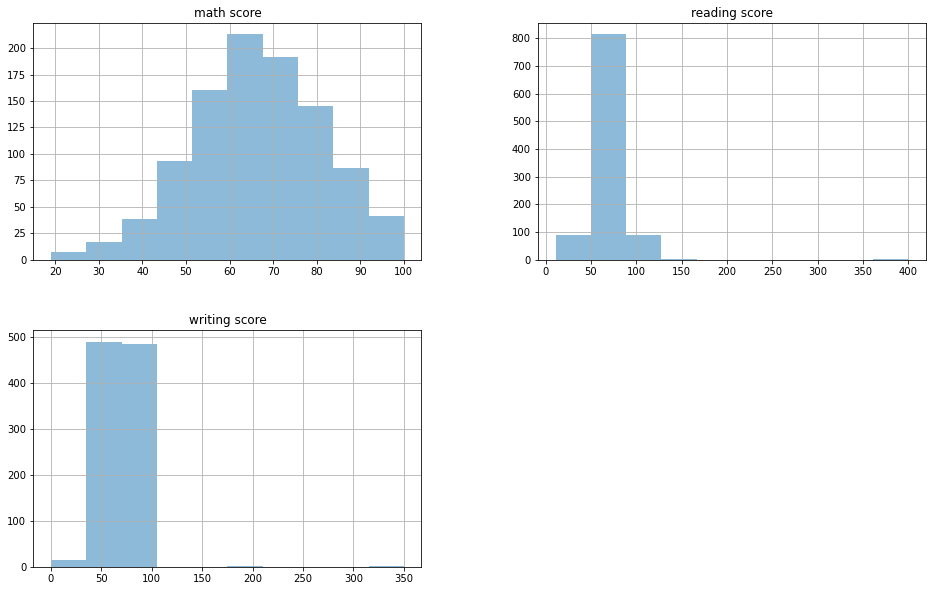

In [18]:

dfs.hist(alpha=0.5, figsize=(16, 10))

<AxesSubplot:xlabel='writing score', ylabel='Density'>

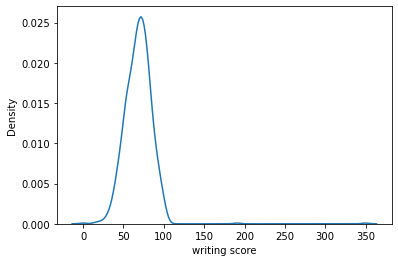

In [19]:
sns.kdeplot(dfs['writing score'])


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

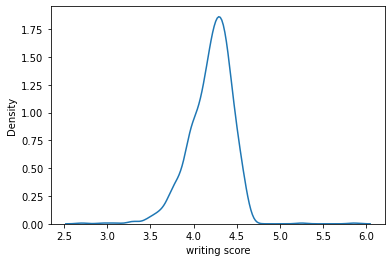

In [20]:

a = np.log(dfs['writing score'])

a.skew(axis=0)

sns.kdeplot(a)

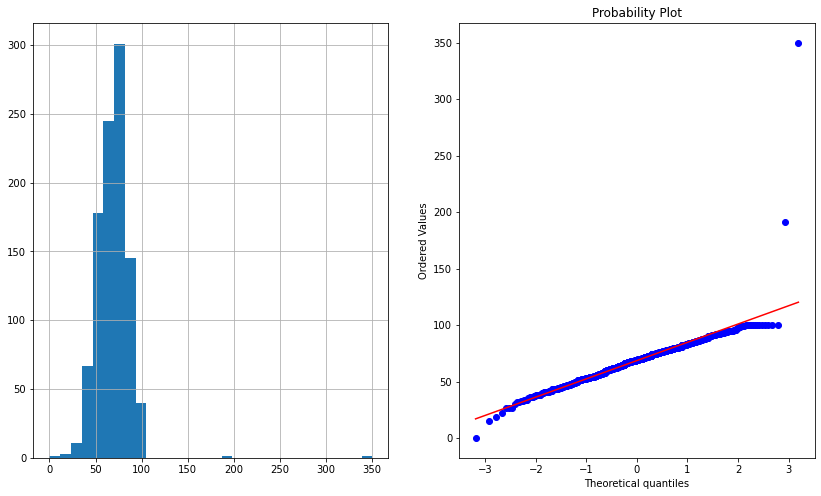

In [21]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['writing score'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['writing score'], dist="norm", plot=plt)
plt.show()

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


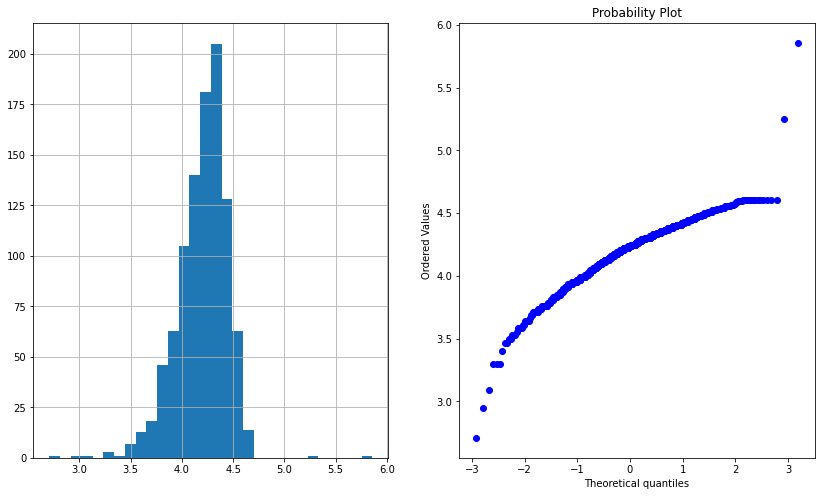

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
# dfs['writing log'].hist(bins=30)

a[np.isfinite(a)].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()

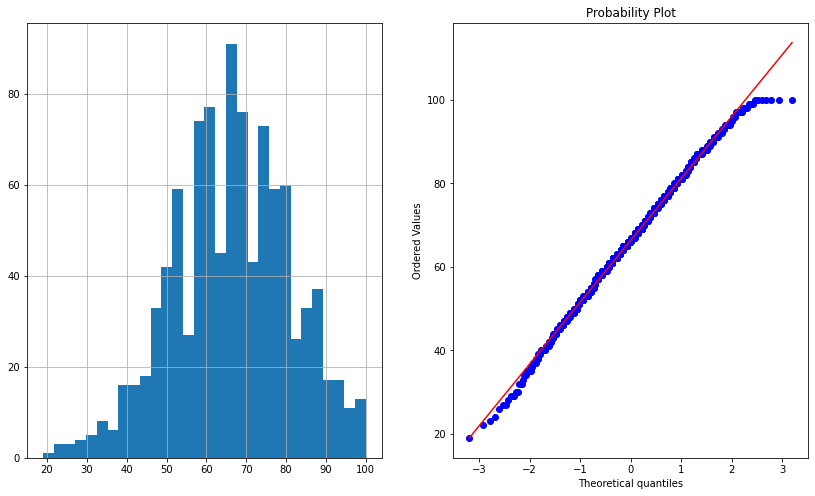

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['math score'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['math score'], dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='math score', ylabel='Density'>

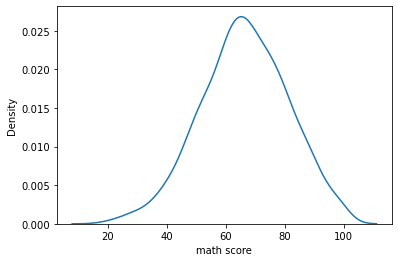

In [24]:
sns.kdeplot(dfs['math score'])



<AxesSubplot:xlabel='math score', ylabel='Density'>

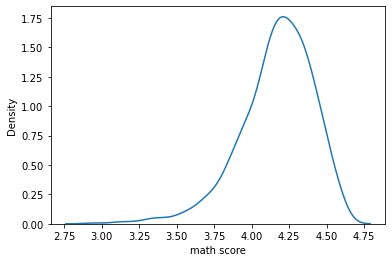

In [25]:
m = np.log(dfs['math score'])

m.skew(axis=0)

sns.kdeplot(m)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


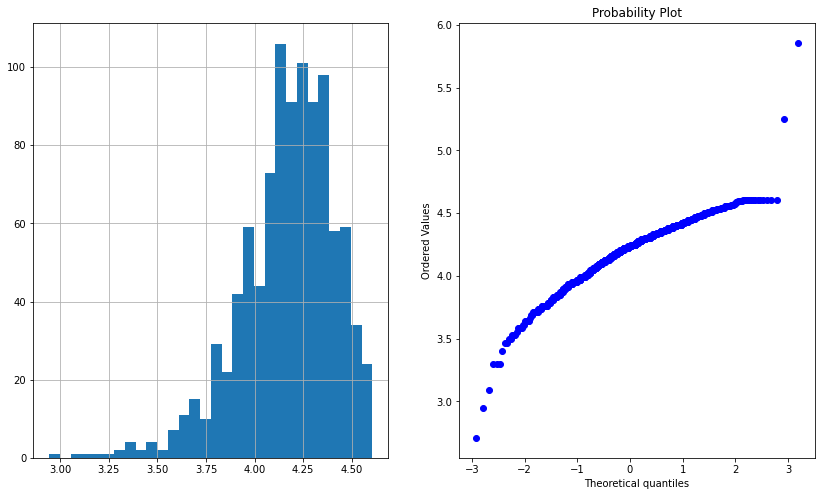

In [26]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
# dfs['writing log'].hist(bins=30)

m[np.isfinite(m)].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()